# Part 2

# Understanding the correlations between ocean hydrodynamic and biogeochemical variables around the 2019 flood event from the Budekin River 

**Notebook outline:**

In this notebook, the potential correlations between different ocean hydrodynamic (HYDRO) and biogeochemical (BGC) variables will be assessed for the 2019 flood event from the Burdekin River. 

# Setup

Load in required packages for analysis

In [2]:
# import pandas
import pandas as pd

# import matplotlib 
from matplotlib import pyplot as plt

# setup default plot parametersand view in notebook 
plt.rcParams['figure.figsize'] = (16,8)
%matplotlib inline

# import autocorrelation function 
from statsmodels.graphics.tsaplots import plot_acf

# import plotly for interactive plots 
import plotly.express as px

# import seaborn for heatmap (correlations)
import seaborn as sns

# import numpy
import numpy as np

# Load and setup data 

Load in master data file and setup structure to facilitate analysis. 

In [3]:
# Load in df 
df = pd.read_csv(
        "masterdf.csv",
        sep=r",",
        engine="c",
        header=0,
        na_filter=False,
        low_memory=False,
    )

Check that the dataframe has been loaded in correctly: 

In [4]:
df.head()

,Aggregated Date/Time,Depth,Site Name,Latitude,Longitude,Distance from rivermouth,omega,pH,salt,chloro
0,2010-12-01,-0.5,Old Reef,-19.4035,148.11089,61.465,3.000000,8.000000,35.326149,1.000000e-12
1,2010-12-02,-0.5,Old Reef,-19.4035,148.11089,61.465,3.584837,8.045557,35.341277,1.000000e-12
2,2010-12-03,-0.5,Old Reef,-19.4035,148.11089,61.465,3.617490,8.043440,35.339268,1.000000e-12
3,2010-12-04,-0.5,Old Reef,-19.4035,148.11089,61.465,3.628837,8.039520,35.334864,1.000000e-12
4,2010-12-05,-0.5,Old Reef,-19.4035,148.11089,61.465,3.630052,8.038121,35.334683,1.000000e-12


Adjust "Aggregate Date/Time" column to date/time format

In [5]:
df['Aggregated Date/Time']= pd.to_datetime(df['Aggregated Date/Time'])

Remove spaces and symbolsin column names (for formatting and analysis purporses)

In [6]:
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace('/','_')

# Autocorrelations 

For the 2019 flood event (the case study flood event), assess potential autocorrelations. If variables are autocorrelated, this means they are time dependent. 

Filter data for 2019 flood event (arbitary time period chosen in Part 1: 1st January 2019 - 1st April 2019). 

In [7]:
# Extract values that lie within date range selected (01/01/2019 - 01/04/2019)
mask = (df.Aggregated_Date_Time >= '2019-01-01') & (df.Aggregated_Date_Time <= '2019-04-01')
# create new object with these dates 
df_2019 = df.loc[mask]

Plot autocorrelations for each HYDRO and BGC variable for the 2019 flood event: 

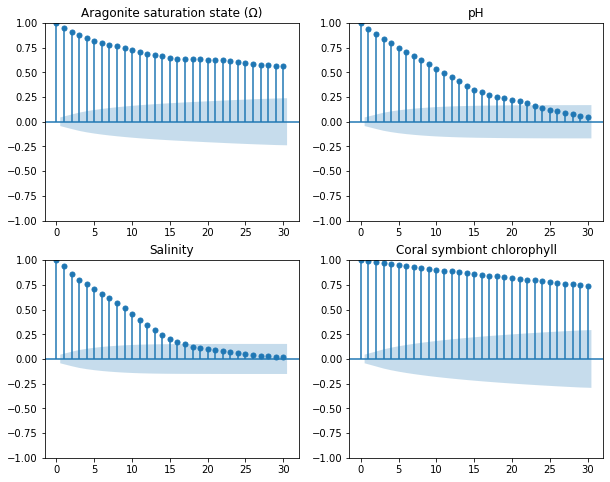

In [8]:
# Extract data for each variable 
omega = df_2019[['Aggregated_Date_Time', 'omega']].set_index(['Aggregated_Date_Time'])
pH = df_2019[["Aggregated_Date_Time", "pH"]].set_index(["Aggregated_Date_Time"])
salt = df_2019[["Aggregated_Date_Time", "salt"]].set_index(["Aggregated_Date_Time"])
chloro = df_2019[["Aggregated_Date_Time", "chloro"]].set_index(["Aggregated_Date_Time"])

# Setup plot structure 
fig, ax = plt.subplots(2,2,figsize=(10,8))

# Plot autocorrelations as subplots 
ax1 = plot_acf(omega, lags=30, ax=ax[0, 0], title = 'Aragonite saturation state (Ω)')
ax2 = plot_acf(pH, lags=30, ax=ax[0, 1], title = "pH")
ax3 = plot_acf(salt, lags=30, ax=ax[1, 0], title = "Salinity")
ax4 = plot_acf(chloro, lags=30, ax=ax[1, 1], title = "Coral symbiont chlorophyll")

# Change sub-plot titles: 


# plt.show()

**Plot analysis:**

For all variables, the gradual decline in autocorrelations indicates that they are time dependent during the 2019 flood. 
For aragonite saturation state and coral symbiont chlorophyll, all variables are highly correlated with one-another (all autocorrelations lie above the blue shaded area indicating significance). For pH, variables up until ~lag 23 are strongly autocorrelated, and for salinity up to ~lag 17. 

# Correlations 

Plot scatterplots of each HYDRO and BGC variable to visually assess any correlations present between variables: 

In [17]:
fig = px.scatter_matrix(df_2019, dimensions = ["Distance_from_rivermouth", "omega", "pH", "salt", "chloro"])
fig.show()

**Plot analysis:**

From the scatterplots, some strong potential correlations were noted. Variability in argonite saturation state, pH, and salinity all decreased with increasing distance from the rivermouth, whereas variability in coral symbiont chlorophyll values increased with increasing distance from the rivermouth. Both aragonite saturation state and salinity appear to show a positive correlation with the distance from the rivermouth, however the increasing trend becomes shallower as distance increases. There appears to be a strong positive relationship between aragonite saturation state and salinity, and a strong negative relationship between salnity and pH. There is a strong positive relationship between araognite saturation state and pH when pH values are more acidic, whereas for more strongly alkaline pH values this relationship becomes negative. No clear trends are apparent between coral symbiont chlorophyll and the other HYDRO and GBC variables. All potential relationships and correlations are quantified below: 

Calculate correation matrix to assess the relationship between different HYDRO and BGC variables for the 2019 flood event. 

In [25]:
# Drop unnecessary columns from matrix: 
df = df_2019[["Distance_from_rivermouth", "omega", "pH", "salt", "chloro"]]

# Built correlation matrix for 2019 flood event (using 2019 flood event data extracted earlier)
corrMatrix_2019 = df.corr()

# View matrix: 
print(corrMatrix_2019)

# option to save matrix: 
# corrMatrix_2019.to_csv("Data/211022corrMatrix_2019.csv")

                          Distance_from_rivermouth     omega        pH  \
Distance_from_rivermouth                  1.000000  0.574124  0.378510   
omega                                     0.574124  1.000000  0.349682   
pH                                        0.378510  0.349682  1.000000   
salt                                      0.321603  0.746692 -0.293033   
chloro                                    0.629931  0.291252  0.205495   

                              salt    chloro  
Distance_from_rivermouth  0.321603  0.629931  
omega                     0.746692  0.291252  
pH                       -0.293033  0.205495  
salt                      1.000000  0.138714  
chloro                    0.138714  1.000000  


Visualise matrix as a heatmap:

[Text(0, 0.5, 'Distance from rivermouth'),
 Text(0, 1.5, 'Ω'),
 Text(0, 2.5, 'pH'),
 Text(0, 3.5, 'Salinity'),
 Text(0, 4.5, 'Coral Symbiont Chlorophyll')]

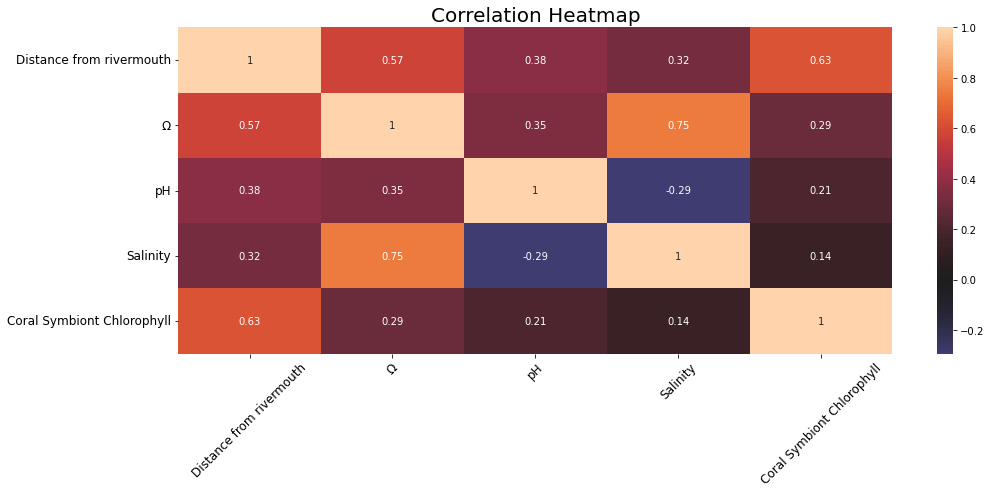

In [27]:
# Plot formatting: 
plt.figure(figsize=(16, 6))

# Build heatmap 
heatmap = sns.heatmap(corrMatrix_2019, 
                      annot=True, 
                      center = 0
                     )

# Format heatmap: 
## Title 
heatmap.set_title("Correlation Heatmap", size = 20)

## X-axis labels 
heatmap.set_xticklabels(["Distance from rivermouth", 
                         "Ω", 
                         "pH", 
                         "Salinity", 
                         "Coral Symbiont Chlorophyll"], size= 12, rotation= 45)

## Y-axis labels 
heatmap.set_yticklabels(["Distance from rivermouth", 
                         "Ω", 
                         "pH", 
                         "Salinity", 
                         "Coral Symbiont Chlorophyll"], size= 12)

**Plot analysis:**


As noted from the scatterplots (above), the strongest correlation was between aragonite saturation state and salinity (+0.75), followed by coral symbiont chlorophyll and distance to rivermouth (+0.63), aragonite saturation state and distance to rivermouth (+0.57), and pH and aragonite saturation state (+0.35). All other correlations were low (< +0.30). The only negative correlation was between salinity and pH (-0.29), as shown in the scatterplots (above). 